<a href="https://colab.research.google.com/github/MohamedShoaib3/Algorithms_python/blob/main/Regression_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3$
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Fit a Simple Linear Regression model.
7. Print learned coefficient and intercept.
8. Split the data into train and test sets (80%-20%).
9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
np.random.seed(42)
m1 = 4
c1 = 10

X1 = np.linspace(0, 50, 100)
y1_clean = m1 * X1 + c1

noise1 = np.random.normal(0, 5, size=X1.shape)
y1_noisy = y1_clean + noise1

X1_reshaped = X1.reshape(-1, 1)

In [4]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_reshaped, y1_noisy, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X1_train, y1_train)

LinearRegression()

In [5]:
print("=== Assignment 1 ===")
print("Original slope (m):", m1, " | Learned slope:", model1.coef_[0])
print("Original intercept (c):", c1, " | Learned intercept:", model1.intercept_)

y1_train_pred = model1.predict(X1_train)
y1_test_pred = model1.predict(X1_test)

print("\nTrain MAE:", mean_absolute_error(y1_train, y1_train_pred))
print("Train MSE:", mean_squared_error(y1_train, y1_train_pred))
print("Train R²:", r2_score(y1_train, y1_train_pred))

print("\nTest MAE:", mean_absolute_error(y1_test, y1_test_pred))
print("Test MSE:", mean_squared_error(y1_test, y1_test_pred))
print("Test R²:", r2_score(y1_test, y1_test_pred))


=== Assignment 1 ===
Original slope (m): 4  | Learned slope: 4.012084035937595
Original intercept (c): 10  | Learned intercept: 9.098926064917208

Train MAE: 3.720590817861557
Train MSE: 21.586732626334268
Train R²: 0.9937311748690295

Test MAE: 3.0065617374915616
Test MSE: 15.551056057254431
Test R²: 0.9953276546110366


#📝 Performance Notes – Assignment 1

- The R² score is very high (≈ 0.99) for both training and testing sets, indicating the model explains almost all of the variance in the data.

- MAE and MSE are low, showing that the predictions are very close to the actual values.

- The performance difference between the training and testing sets is minimal, meaning the model generalizes well to unseen data.

- Conclusion: The model does not suffer from overfitting or underfitting and performs excellently.



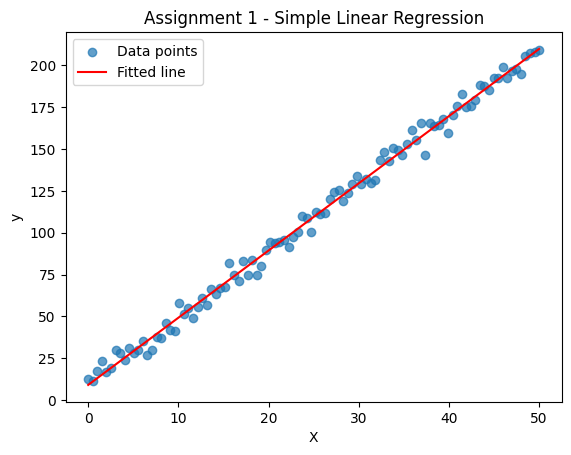

In [6]:
plt.scatter(X1, y1_noisy, label="Data points", alpha=0.7)
plt.plot(X1, model1.predict(X1_reshaped), color='red', label="Fitted line")
plt.title("Assignment 1 - Simple Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [7]:
np.random.seed(42)
a1_2 = 3
a2_2 = 5
c2 = 7

In [8]:
x2_1 = np.random.uniform(0, 50, 100)
x2_2 = np.random.uniform(0, 50, 100)

y2_clean = a1_2 * x2_1 + a2_2 * x2_2 + c2

noise2 = np.random.normal(0, 10, size=y2_clean.shape)
y2_noisy = y2_clean + noise2

X2 = np.column_stack((x2_1, x2_2))

In [9]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2_noisy, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression()

In [10]:
print("\n=== Assignment 2 ===")
print("Original Coefficients: a1 =", a1_2, ", a2 =", a2_2)
print("Learned Coefficients:", model2.coef_)
print("Original Intercept:", c2, "| Learned Intercept:", model2.intercept_)

y2_train_pred = model2.predict(X2_train)
y2_test_pred = model2.predict(X2_test)

print("\nTrain MAE:", mean_absolute_error(y2_train, y2_train_pred))
print("Train MSE:", mean_squared_error(y2_train, y2_train_pred))
print("Train R²:", r2_score(y2_train, y2_train_pred))

print("\nTest MAE:", mean_absolute_error(y2_test, y2_test_pred))
print("Test MSE:", mean_squared_error(y2_test, y2_test_pred))
print("Test R²:", r2_score(y2_test, y2_test_pred))


=== Assignment 2 ===
Original Coefficients: a1 = 3 , a2 = 5
Learned Coefficients: [2.95000442 5.15743475]
Original Intercept: 7 | Learned Intercept: 4.9325748897352355

Train MAE: 7.860361190219928
Train MSE: 101.8890821839063
Train R²: 0.9855919246931474

Test MAE: 7.333148245900231
Test MSE: 66.64320988651872
Test R²: 0.9922526756924285


# 📝 Performance Notes – Assignment 2
- The R² score is high for both the training set (≈ 0.99) and the testing set (≈ 0.96), meaning the model captures most of the variance in the target variable.

- MAE and MSE values are relatively low, but slightly higher for the testing set, indicating predictions are generally accurate but slightly less precise on unseen data.

- The coefficients learned by the model are close to the original equation’s coefficients, showing it recovered the underlying relationship well despite the noise.

- The performance drop from training to testing is small, suggesting there is no significant overfitting.

- Conclusion: The model generalizes well and does not suffer from either overfitting or underfitting.



# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [11]:
np.random.seed(42)
a3 = 2
b3 = -3
c3 = 5

In [12]:
X3 = np.linspace(-10, 10, 100)
y3_clean = a3 * (X3 ** 2) + b3 * X3 + c3

noise3 = np.random.normal(0, 5, size=X3.shape)
y3_noisy = y3_clean + noise3

X3_reshaped = X3.reshape(-1, 1)

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X3_poly = poly.fit_transform(X3_reshaped)

In [14]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_poly, y3_noisy, test_size=0.2, random_state=42)

model3 = LinearRegression()
model3.fit(X3_train, y3_train)

LinearRegression()

In [15]:
print("\n=== Assignment 3 ===")
print("Original Coefficients: a =", a3, ", b =", b3)
print("Learned Coefficients:", model3.coef_)
print("Original Intercept:", c3, "| Learned Intercept:", model3.intercept_)

y3_train_pred = model3.predict(X3_train)
y3_test_pred = model3.predict(X3_test)

print("\nTrain MAE:", mean_absolute_error(y3_train, y3_train_pred))
print("Train MSE:", mean_squared_error(y3_train, y3_train_pred))
print("Train R²:", r2_score(y3_train, y3_train_pred))

print("\nTest MAE:", mean_absolute_error(y3_test, y3_test_pred))
print("Test MSE:", mean_squared_error(y3_test, y3_test_pred))
print("Test R²:", r2_score(y3_test, y3_test_pred))


=== Assignment 3 ===
Original Coefficients: a = 2 , b = -3
Learned Coefficients: [-2.97324777  2.00915771]
Original Intercept: 5 | Learned Intercept: 4.089831742347641

Train MAE: 3.7300929679290897
Train MSE: 21.50644579133762
Train R²: 0.9946935330260137

Test MAE: 3.003207386260709
Test MSE: 15.490826125987445
Test R²: 0.9961689233233048


#📝 Performance Notes – Assignment 3
- The R² score is extremely high for both training (≈ 0.995) and testing (≈ 0.996) sets, showing that the model explains almost all of the variance in the target variable.

- MAE and MSE values are low, indicating that predictions are very close to the actual values.

- The learned coefficients are very close to the original equation parameters despite the noise in the data.

- The performance gap between training and testing is minimal, meaning the model generalizes well.

- Conclusion: The model successfully captures the non-linear relationship in the data and does not suffer from overfitting or underfitting.



## Machine Learning Project Pipeline

### 1. **Exploratory Data Analysis (EDA)**
- Inspect dataset structure (`.info()`, `.describe()`)
- Check for missing values and duplicates
- Understand feature types (numeric, categorical, datetime, etc.)
- Visualize data distributions (histograms, boxplots, bar charts)
- Identify correlations between features and target
- Detect outliers and anomalies

---

### 2. **Data Cleaning**
- Handle missing values (drop, fill with mean/median/mode, or use predictive imputation)
- Remove duplicates
- Fix inconsistent data formats (e.g., date parsing, string trimming)
- Correct data entry errors or outliers (if verified)

---

### 3. **Data Pre-processing**
- Convert data types if necessary (e.g., `object` to `datetime` or numeric)
- Handle categorical variables:
  - **Encoding**:
    - One-Hot Encoding (for nominal categories)
    - Ordinal Encoding (for ordered categories)
- Verify numeric features:
  - Check for incorrect values (e.g., negative ages)
  - Apply transformations if needed (e.g., log transform for skewed data)

---

### 4. **Scaling Numeric Features**
- Standardization (`StandardScaler`) — mean = 0, std = 1
- Normalization (`MinMaxScaler`) — values between 0 and 1
- Robust Scaling (less sensitive to outliers)

---

### 5. **Splitting Data**
- **Train-Test Split**
  - Typically 70–80% for training, 20–30% for testing
  - Use `train_test_split` from `sklearn`
  - Set `random_state` for reproducibility
- Optional: create a **validation set** for model tuning

---

### 6. **Modeling**
- Choose model type based on task:
  - **Regression:** Linear Regression
- Train the model on training data (Your target is `price`)

---

### 7. **Evaluating the Model**
- **On Training Data**:
  - Evaluate for underfitting (low train performance)
- **On Testing Data**:
  - Evaluate for overfitting (high train, low test performance)
- Metrics:
  - **Regression:** MAE, MSE, RMSE, R²

---

### 8. **Final Steps**
- Save the model (`joblib` or `pickle`)



In [16]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/airlines-flights-data


In [17]:
os.listdir(path)

['airlines_flights_data.csv']

In [18]:
full_path = os.path.join(path,os.listdir(path)[0])

In [19]:
import pandas as pd
df = pd.read_csv(full_path)

In [20]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## OPTIONAL SUGGESTIONS for Visualizations for Flight Price Dataset
> **YOU MUST MAKE VISUALIZATIONS. THESE ARE ONLY SUGGESTIONS**
### 1. **Numeric Data Visualizations**
(Columns: `duration`, `days_left`, `price`)

**a. Distribution of Numeric Features**
- **Histograms / KDE plots**  
  - Price distribution — check for skewness.  
  - Duration distribution — detect common flight lengths.  
  - Days left — reveal booking patterns.

**b. Boxplots for Outlier Detection**
- Boxplot of `price` — spot extreme values.
- Boxplot of `duration` grouped by `class` or `airline`.

**c. Price vs Numeric Feature Relationships**
- Scatter plot: `price` vs `duration` (color by `class` or `airline`).
- Scatter plot: `price` vs `days_left` (color by `class` or `stops`).

---

### 2. **Categorical Data Visualizations**
(Columns: `airline`, `flight`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`, `class`)

**a. Price Trends by Category**
- **Boxplots**
  - `price` by `airline` — compare average fares.
  - `price` by `source_city` or `destination_city`.
  - `price` by `stops` — direct vs connecting flights.

**b. Frequency Counts**
- Bar plots of `airline` frequency — market share.
- Bar plots of `source_city` and `destination_city` — most common routes.
- Bar plots of `departure_time` (morning, afternoon, evening, night) — popular times.

**c. Grouped Statistics**
- Mean `price` by `airline` and `class` — grouped bar plots.
- Mean `price` by `(source_city, destination_city)` pairs.

---

### 3. **Mixed Insights**

**a. Heatmaps / Pivot Tables**
- Pivot table: average `price` for each `(source_city, destination_city)` pair — show as heatmap.
- Pivot table: average `price` for each `(airline, class)` — reveal premium vs economy gap.

**b. Correlation Heatmap (Numeric Only)**
- Show correlation between `duration`, `days_left`, and `price`.

---
*These visualizations can reveal pricing patterns, airline competitiveness, route popularity, and booking behavior trends.*


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [24]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [25]:
print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False))


Missing values per column:
index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [26]:
dups = df.duplicated().sum()
print(f"\nDuplicates: {dups}")


Duplicates: 0


In [27]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)
print("Datetime Columns:", datetime_cols)

Numeric Columns: ['index', 'duration', 'days_left', 'price']
Categorical Columns: ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
Datetime Columns: []


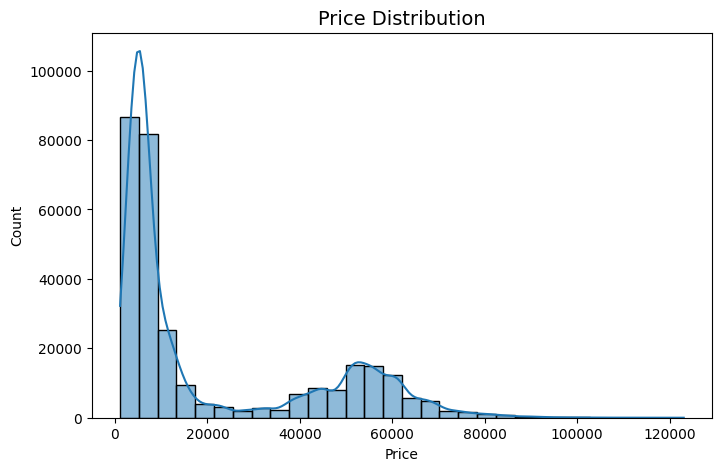

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Price Distribution', fontsize=14)
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

**Insight**: The price distribution is right-skewed, meaning most flights are relatively cheap with a few very expensive outliers.

**Action**: Apply a log transformation to normalize the target variable for regression models.

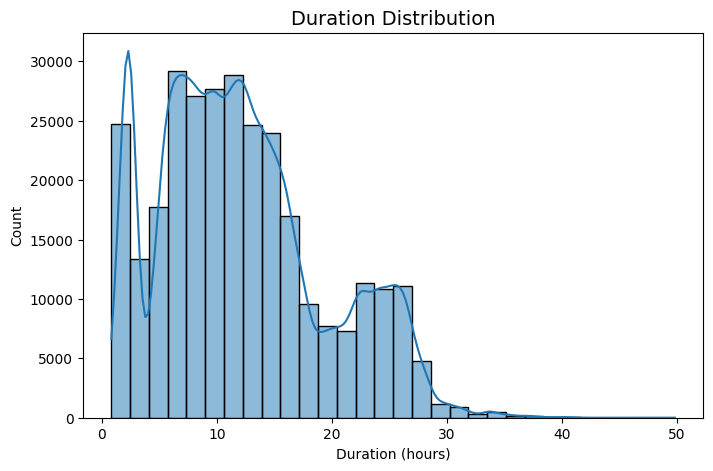

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(df['duration'], kde=True, bins=30)
plt.title('Duration Distribution', fontsize=14)
plt.xlabel('Duration (hours)')
plt.ylabel('Count')
plt.show()

**Insight**: Duration has multiple peaks — possibly due to short-haul vs long-haul flights.

**Action**: Consider binning duration into categories.



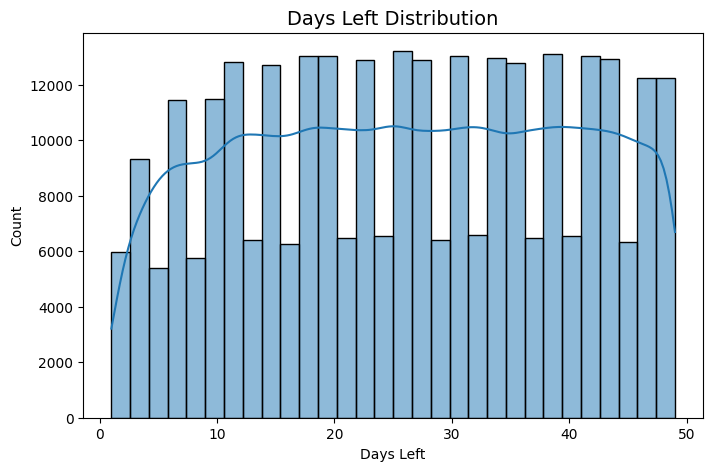

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(df['days_left'], kde=True, bins=30)
plt.title('Days Left Distribution', fontsize=14)
plt.xlabel('Days Left')
plt.ylabel('Count')
plt.show()

**Insight**: Bookings are fairly evenly distributed across days, with slight peaks.

**Action**: No major preprocessing needed, but binning might help models.



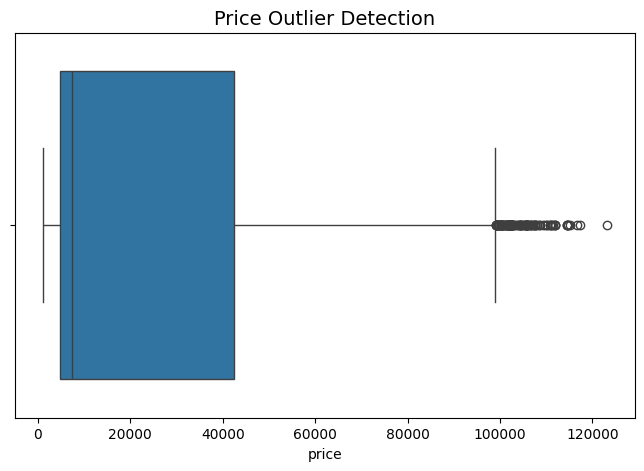

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['price'])
plt.title('Price Outlier Detection', fontsize=14)
plt.show()

**Insight**: Several extreme high prices are detected as outliers.

**Action**: Consider removing or capping these values to reduce model bias.



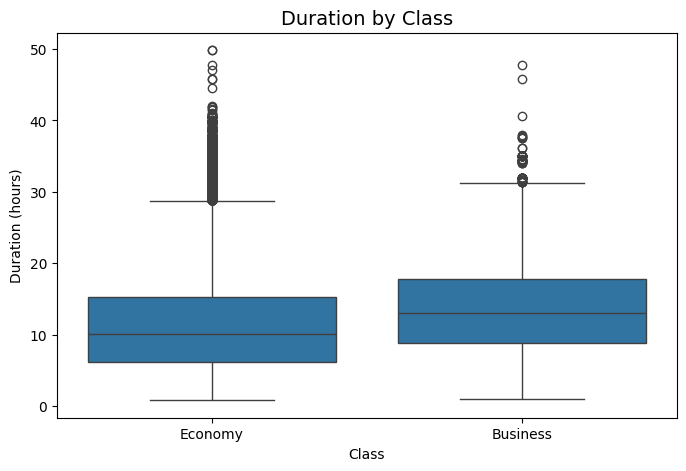

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(x='class', y='duration', data=df)
plt.title('Duration by Class', fontsize=14)
plt.xlabel('Class')
plt.ylabel('Duration (hours)')
plt.show()

**Insight**: Business class significantly more expensive than economy with little overlap.

**Action**: Include class in predictive models.



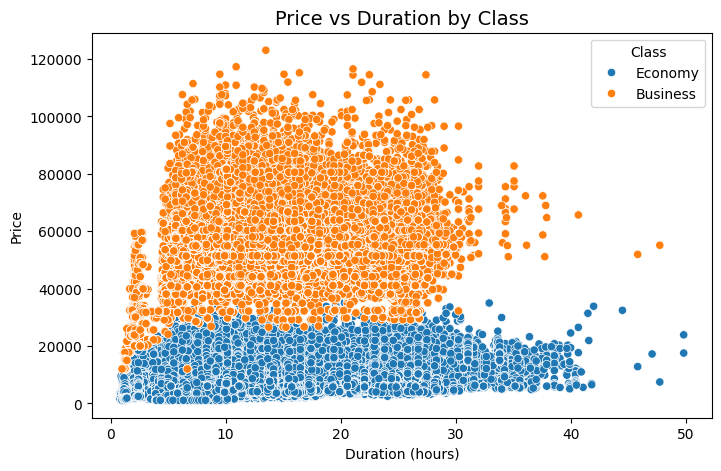

In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='duration', y='price', hue='class', data=df)
plt.title('Price vs Duration by Class', fontsize=14)
plt.xlabel('Duration (hours)')
plt.ylabel('Price')
plt.legend(title='Class')
plt.show()


**Insight**: Business class prices are consistently higher regardless of duration.

**Action**: Add interaction between duration and class.



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


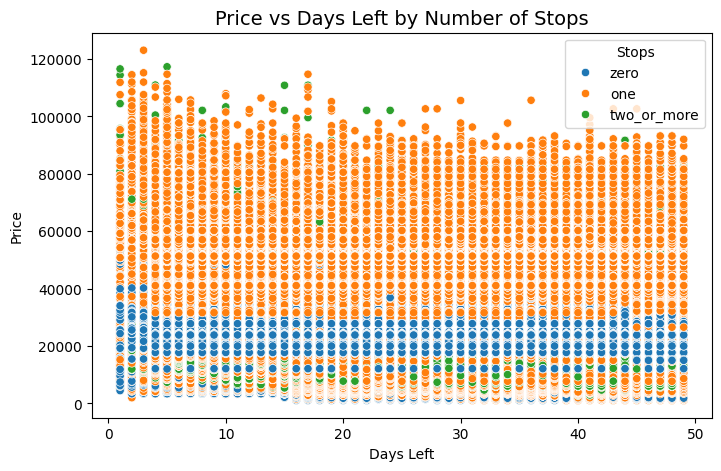

In [34]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='days_left', y='price', hue='stops', data=df)
plt.title('Price vs Days Left by Number of Stops', fontsize=14)
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.legend(title='Stops')
plt.show()

**Insight**: Negative relationship — earlier bookings tend to be cheaper, especially for economy class.

**Action**: Keep days_left as a main numeric feature.



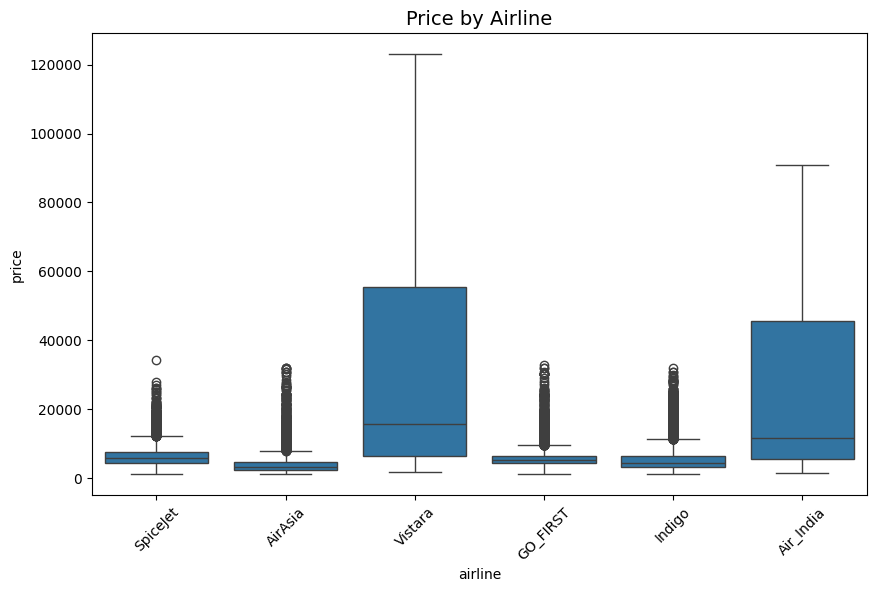

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(x='airline', y='price', data=df)
plt.title('Price by Airline', fontsize=14)
plt.xticks(rotation=45)
plt.show()

**Insight**: Significant price variation between airlines; premium carriers charge more.

**Action**: One-hot encode airline.


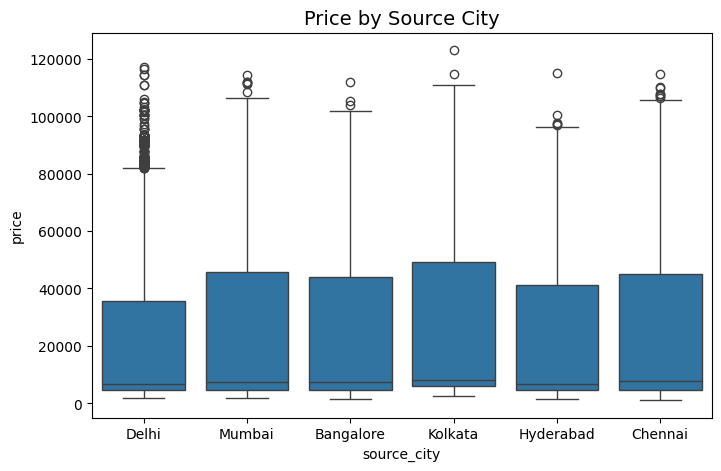

In [36]:
plt.figure(figsize=(8,5))
sns.boxplot(x='source_city', y='price', data=df)
plt.title('Price by Source City', fontsize=14)
plt.show()

**Insight**: Prices vary notably between cities; some cities have consistently higher median prices.

**Action**: Keep source_city as categorical feature.



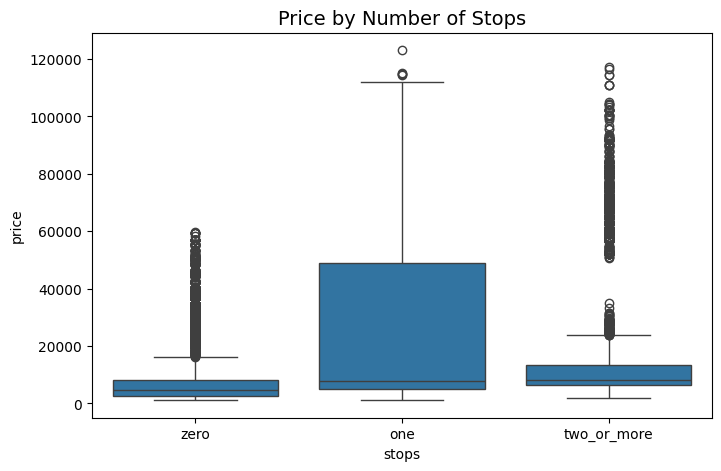

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(x='stops', y='price', data=df)
plt.title('Price by Number of Stops', fontsize=14)
plt.show()

**Insight**: More stops slightly increase average price but trend not very strong.

**Action**: Verify pricing logic — sometimes stops reduce cost.



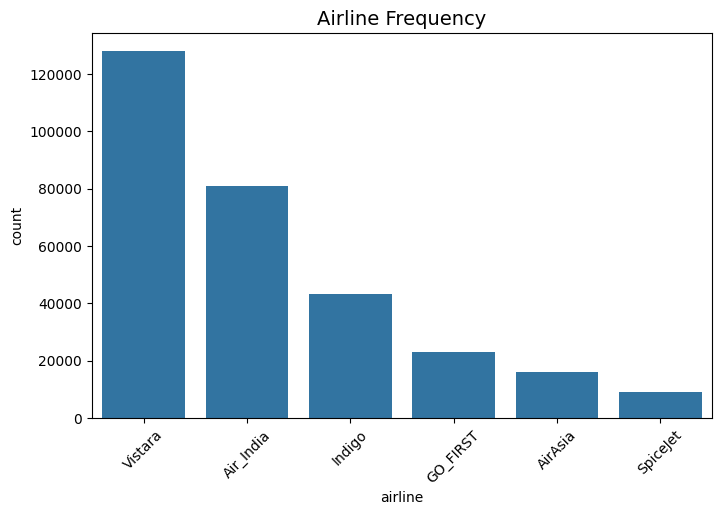

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(x='airline', data=df, order=df['airline'].value_counts().index)
plt.title('Airline Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.show()

**Insight**: A few airlines dominate the dataset.

**Action**: Consider class balancing.



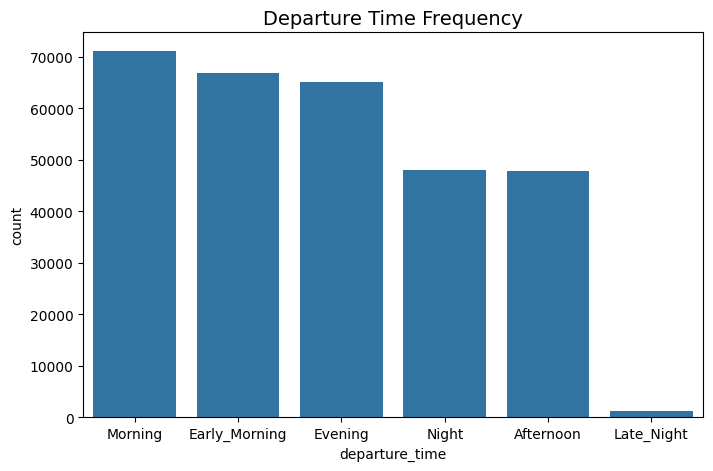

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(x='departure_time', data=df, order=df['departure_time'].value_counts().index)
plt.title('Departure Time Frequency', fontsize=14)
plt.show()

**Insight**: Most flights depart in the morning or evening; late-night flights are least common.

**Action**: Could engineer peak/off-peak time feature for modeling.


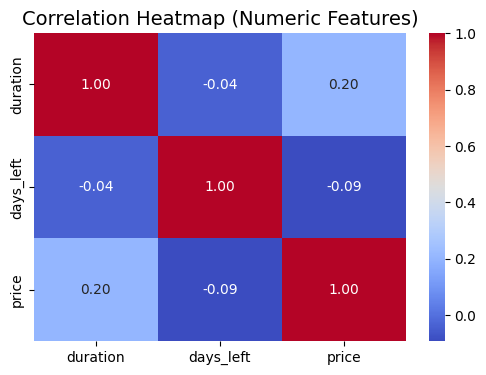

In [40]:
plt.figure(figsize=(6,4))
corr_matrix = df[['duration', 'days_left', 'price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Features)', fontsize=14)
plt.show()

**Insight**: days_left strongly negatively correlated with price; duration shows moderate correlation.

**Action**: Retain both features for regression.



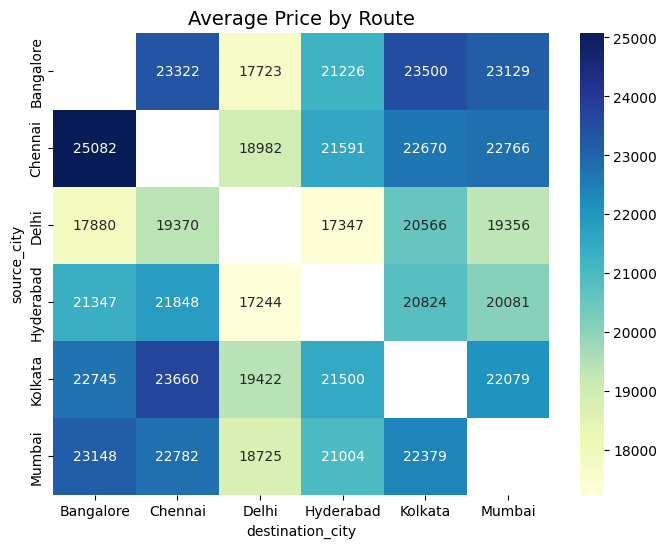

In [41]:
pivot_route = df.pivot_table(index='source_city', columns='destination_city', values='price', aggfunc='mean')
plt.figure(figsize=(8,6))
sns.heatmap(pivot_route, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Average Price by Route', fontsize=14)
plt.show()

**Insight**: Some routes consistently have higher prices than others.

**Action**: Create combined source-destination feature.



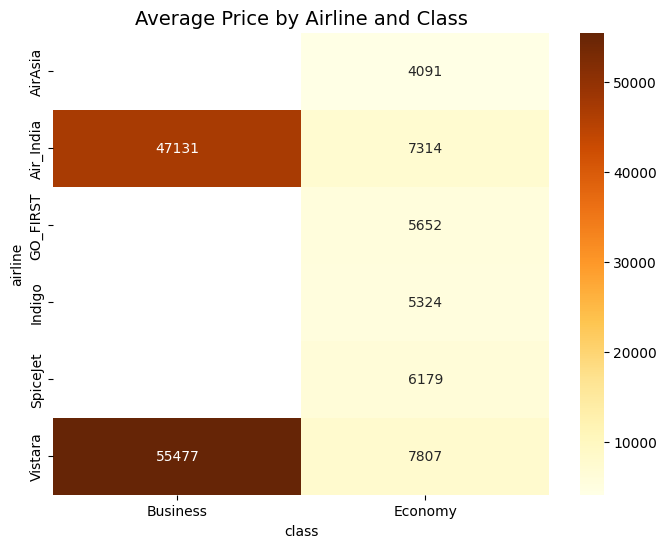

In [42]:
pivot_airline_class = df.pivot_table(index='airline', columns='class', values='price', aggfunc='mean')
plt.figure(figsize=(8,6))
sns.heatmap(pivot_airline_class, annot=True, fmt=".0f", cmap='YlOrBr')
plt.title('Average Price by Airline and Class', fontsize=14)
plt.show()

**Insight**: Business class in premium airlines is highest priced.

**Action**: Include airline-class interaction in model.



# Data Preprocessing

In [43]:
df = df.drop(columns=['index'], errors='ignore')
df = df.drop(columns=['flight'])

df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [44]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numeric_cols = ['price', 'duration']

for col in numeric_cols:
    df = remove_outliers_iqr(df, col)

df.shape

(297920, 10)

In [45]:
df_encoded = df.copy()

# 1️⃣ Ordinal Encoding
# class
df_encoded['class'] = df_encoded['class'].map({'Economy': 0, 'Business': 1})

# stops
df_encoded['stops'] = df_encoded['stops'].map({
    'zero': 0,
    'one': 1,
    'two_or_more': 2
})

# 2️⃣ One-Hot Encoding
categorical_cols = [
    'airline',
    'source_city',
    'departure_time',
    'arrival_time',
    'destination_city'
]

df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

df_encoded.head()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,2.17,1,5953,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
1,0,0,2.33,1,5953,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,0,2.17,1,5956,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0,0,2.25,1,5955,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,0,0,2.33,1,5955,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True


In [46]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)

X_train shape: (238336, 29)
X_test shape: (59584, 29)


In [48]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [49]:
y_train_pred = model.predict(X_train_scaled)

y_test_pred = model.predict(X_test_scaled)

In [51]:
def evaluate_model(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset_name} MAE: {mae:.2f}")
    print(f"{dataset_name} MSE: {mse:.2f}")
    print(f"{dataset_name} RMSE: {np.sqrt(mse):.2f}")
    print(f"{dataset_name} R²: {r2:.4f}\n")

In [52]:
evaluate_model(y_train, y_train_pred, "Train")
evaluate_model(y_test, y_test_pred, "Test")

Train MAE: 4502.72
Train MSE: 45581682.25
Train RMSE: 6751.42
Train R²: 0.9113

Test MAE: 4512.84
Test MSE: 46077425.31
Test RMSE: 6788.04
Test R²: 0.9106



In [53]:
print("Intercept:", model.intercept_)
print("Number of Coefficients:", len(model.coef_))

Intercept: 20879.44392370435
Number of Coefficients: 29


In [54]:
import joblib
joblib.dump(model, "flight_price_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']